# Simple Linear Regression from Scratch

- On considère le dataset `possum.csv` qui rassemble des données sur des opossums.

- Implémentez une **régression linaire** permettant de prédire la variable $Y$ `footlgth`en fonction de la variable $X$ `earconch`.

- On rappelle que le problème de minimisation et la solution associée de la régression linéaire sont donnés par:

\begin{eqnarray*}
\hat \beta_0, \hat \beta_1 & = & \underset{\beta_0, \beta_1}{\arg \min}~\mathrm{RSS} ( \beta_0, \beta_1 ) 
= \underset{\beta_0, \beta_1}{\arg \min} \sum_{i=1}^N \big( (\beta_0 + \beta_1 x_i) - y_i \big)^2 \\
\\
\hat \beta_0  = \bar y - \hat \beta_1 \bar x & ~~~~~\text{et}~~~~~ & \hat \beta_1  = \frac{\sum_{i=1}^N x_i (y_i - \bar y)}{\sum_{i=1}^N x_i (x_i - \bar x)} = \frac{\sum_{i=1}^N ( x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^N (x_i - \bar x)^2} = \frac{S_{xy}}{S_{xx}}  \\
\\
& \text{où} & \bar x = \frac{1}{N}\sum_{i=1}^N x_i ~~~\text{et}~~~ \bar y = \frac{1}{N}\sum_{i=1}^N y_i
\end{eqnarray*}

## Librairies

In [91]:
import pandas as pd
import numpy as np
from seaborn import color_palette

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

## Data

In [36]:
dataset = pd.read_csv("data/possum.csv")

In [37]:
dataset = dataset.dropna()

In [38]:
dataset

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


## Dataset

In [67]:
X = dataset.earconch.to_numpy()
Y = dataset.footlgth.to_numpy()

In [68]:
X, Y

(array([54.5, 51.2, 51.9, 52.2, 53.2, 53.6, 52. , 53.9, 52.9, 53.4, 51.3,
        51. , 49.8, 53.7, 51.8, 51.4, 53.2, 55.4, 53.9, 52.4, 52.9, 52.1,
        53.3, 53.5, 51.6, 56.2, 50.8, 53. , 51.8, 50.8, 52.5, 52. , 51.8,
        53.1, 55.5, 52. , 52. , 49.5, 53.4, 51.4, 51.2, 49.4, 54. , 45.5,
        44.9, 45. , 47.2, 43.9, 44.3, 46. , 46. , 44.9, 46.8, 45.3, 46.4,
        44.5, 47. , 44.9, 41.3, 46.3, 45.1, 41.7, 44.2, 44.1, 43.1, 45.6,
        44.1, 42.8, 42.4, 44.7, 45.9, 45.6, 46.4, 42.9, 44.3, 43. , 44.8,
        41.7, 42.9, 43.3, 43.6, 43.5, 43.7, 46.8, 43.5, 46.2, 44.8, 48. ,
        46.8, 44.9, 45.1, 45.4, 47.7, 46. , 44.3, 43.8, 46.8, 48. , 45.4,
        45.9, 46. ]),
 array([74.5, 72.5, 75.4, 76.1, 71. , 73.2, 71.5, 72.7, 72.4, 70.9, 77.2,
        71.7, 71. , 74.3, 69.7, 73. , 73.2, 73.7, 73.4, 73.8, 77.9, 73.5,
        72.8, 75. , 72.3, 73.6, 70.3, 73.2, 74.9, 70.6, 68. , 74.8, 70.8,
        73.1, 71.2, 74.3, 71.2, 68.4, 68.7, 72.8, 62.7, 72. , 71.5, 66. ,
        66.9, 69

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((80,), (21,), (80,), (21,))

## Linear regression (from scratch)

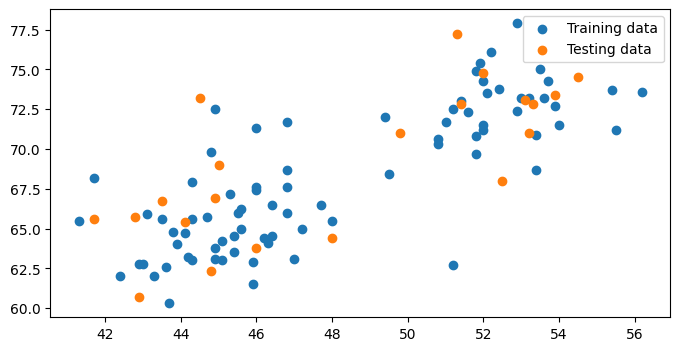

In [71]:
plt.figure(figsize = (8,4))
plt.scatter(X_train, Y_train, label = "Training data")
plt.scatter(X_test, Y_test, label = "Testing data")
plt.legend()
plt.show()

In [72]:
x_bar = np.mean(X)

y_bar = np.mean(Y)

In [73]:
x_bar, y_bar

(np.float64(48.13366336633663), np.float64(68.39801980198018))

In [78]:
num = np.sum((X_train-x_bar)*(Y_train-y_bar))
den = np.sum((X_train - x_bar)**2)
beta_hat_1 = num/den #estimation du paramètre B1
beta_hat_0 = y_bar - beta_hat_1*x_bar #estimation du paramètre B0
#Donc là on a y_hat = beta_hat_0 + beta_hat_1*x

In [79]:
num, den, beta_hat_1, beta_hat_0

(np.float64(1096.727241446917),
 np.float64(1256.2204597588473),
 np.float64(0.8730372387482468),
 np.float64(26.375539245796013))

In [80]:
def y_hat(x) :
    return beta_hat_0 + beta_hat_1*x

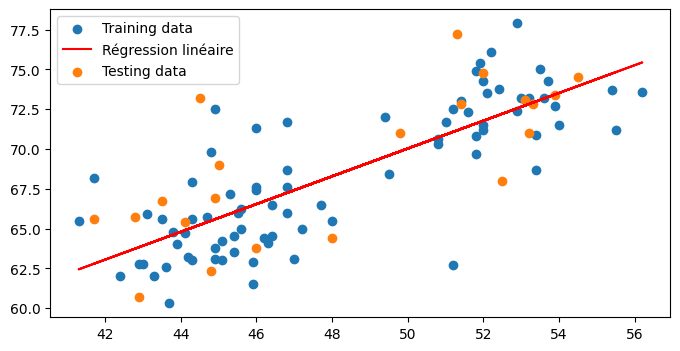

In [84]:
plt.figure(figsize = (8,4))
plt.scatter(X_train, Y_train, label = "Training data")
plt.plot(X_train, y_hat(X_train), label = "Régression linéaire", color = "red")
plt.scatter(X_test, Y_test, label = "Testing data")
plt.legend()
plt.show()

## Linear regression (scikit-learn)

In [86]:
X = X.reshape(-1, 1)
X, Y

(array([[54.5],
        [51.2],
        [51.9],
        [52.2],
        [53.2],
        [53.6],
        [52. ],
        [53.9],
        [52.9],
        [53.4],
        [51.3],
        [51. ],
        [49.8],
        [53.7],
        [51.8],
        [51.4],
        [53.2],
        [55.4],
        [53.9],
        [52.4],
        [52.9],
        [52.1],
        [53.3],
        [53.5],
        [51.6],
        [56.2],
        [50.8],
        [53. ],
        [51.8],
        [50.8],
        [52.5],
        [52. ],
        [51.8],
        [53.1],
        [55.5],
        [52. ],
        [52. ],
        [49.5],
        [53.4],
        [51.4],
        [51.2],
        [49.4],
        [54. ],
        [45.5],
        [44.9],
        [45. ],
        [47.2],
        [43.9],
        [44.3],
        [46. ],
        [46. ],
        [44.9],
        [46.8],
        [45.3],
        [46.4],
        [44.5],
        [47. ],
        [44.9],
        [41.3],
        [46.3],
        [45.1],
        [41.7],
        

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((80, 1), (21, 1), (80,), (21,))

In [99]:
# 1. Instantiation du modèle
model = LinearRegression()

In [100]:
# 2. Entraînement du modèle sur le train set
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [102]:
# 3. Evaluation du modèle sur le test set
y_test_preds = model.predict(X_test)

In [103]:
Y_test, y_test_preds

(array([66.7, 73.2, 65.4, 65.7, 69. , 72.8, 72.8, 66.9, 77.2, 74.5, 73.4,
        68. , 64.4, 73.1, 65.6, 71. , 63.8, 60.7, 71. , 74.8, 62.3]),
 array([64.18102347, 65.05373083, 64.70464789, 63.57012831, 65.49008452,
        71.07541165, 72.73355565, 65.40281378, 70.98814092, 73.78080448,
        73.25718007, 72.03538975, 68.10820661, 72.55901417, 62.61015021,
        72.64628491, 66.36279188, 63.65739905, 69.67907987, 71.59903607,
        65.31554304]))

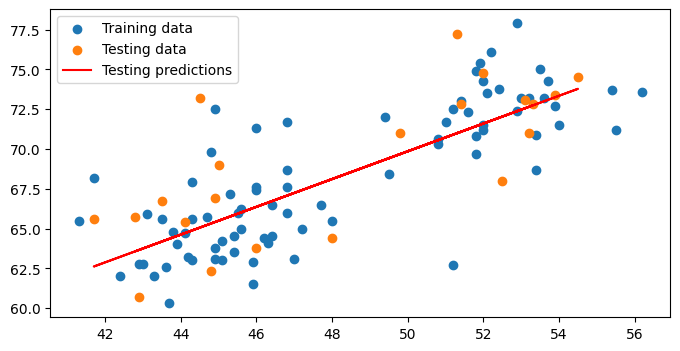

In [109]:
plt.figure(figsize = (8,4))
plt.scatter(X_train, Y_train, label = "Training data")
plt.scatter(X_test, Y_test, label = "Testing data")
plt.plot(X_test, y_test_preds, label = "Testing predictions", color = "red")
plt.legend()
plt.show()

In [110]:
RSS = np.sum((y_test_preds-Y_test)**2)

In [111]:
RSS

np.float64(212.76723763279347)

## Régression linéaire multiple

In [112]:
dataset.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [114]:
X = dataset[['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'earconch', 'eye', 'chest', 'belly']].to_numpy()
Y = dataset.footlgth.to_numpy()
X, Y

(array([[  8. ,  94.1,  60.4,  89. ,  36. ,  54.5,  15.2,  28. ,  36. ],
        [  6. ,  92.5,  57.6,  91.5,  36.5,  51.2,  16. ,  28.5,  33. ],
        [  6. ,  94. ,  60. ,  95.5,  39. ,  51.9,  15.5,  30. ,  34. ],
        [  6. ,  93.2,  57.1,  92. ,  38. ,  52.2,  15.2,  28. ,  34. ],
        [  2. ,  91.5,  56.3,  85.5,  36. ,  53.2,  15.1,  28.5,  33. ],
        [  1. ,  93.1,  54.8,  90.5,  35.5,  53.6,  14.2,  30. ,  32. ],
        [  2. ,  95.3,  58.2,  89.5,  36. ,  52. ,  14.2,  30. ,  34.5],
        [  6. ,  94.8,  57.6,  91. ,  37. ,  53.9,  14.5,  29. ,  34. ],
        [  9. ,  93.4,  56.3,  91.5,  37. ,  52.9,  15.5,  28. ,  33. ],
        [  6. ,  91.8,  58. ,  89.5,  37.5,  53.4,  14.4,  27.5,  32. ],
        [  9. ,  93.3,  57.2,  89.5,  39. ,  51.3,  14.9,  31. ,  34. ],
        [  5. ,  94.9,  55.6,  92. ,  35.5,  51. ,  15.3,  28. ,  33. ],
        [  5. ,  95.1,  59.9,  89.5,  36. ,  49.8,  15.8,  27. ,  32. ],
        [  3. ,  95.4,  57.6,  91.5,  36. ,  53.7, 

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [117]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((80, 9), (21, 9), (80,), (21,))

In [118]:
# 1. Instantiation du modèle
model_2 = LinearRegression()

In [119]:
# 2. Entraînement du modèle sur le train set

In [120]:
model_2.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
model_2.coef_

array([-0.28729382,  0.05541475,  0.06229706,  0.33068319, -0.20271941,
        0.75652652,  0.09059697,  0.03502609,  0.13551714])

In [122]:
# 3. Evaluation du modèle sur le test set

In [126]:
y_test_preds = model_2.predict(X_test)

In [127]:
RSS_2 = np.sum((y_test_preds-Y_test)**2)

In [128]:
RSS_2

np.float64(149.41479840223548)